In [1]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [2]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [3]:
import py_compile
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **List**

In [4]:
# i create my own list
l = ['one', 2, 3.0 , 4.0, "five", 6]
l

['one', 2, 3.0, 4.0, 'five', 6]

In [5]:
# How list can be
first1 = l[0]
second1 = l[1]
print("my first:", first1)
print("my second:", second1)

my first: one
my second: 2


In [6]:
# how negative indexes works
last1 = l[-1]
penultimate1 = l[-2]
antepenultimate1 = l[-3]
print("last:", last1)
print("second to last:", penultimate1)
print("third to last:", antepenultimate1)

last: 6
second to last: five
third to last: 4.0


In [7]:
# How can lists be sliced, here from 1 to 4 position
sublist1 = l[1:5]
sublist1

[2, 3.0, 4.0, 'five']

In [8]:
# l[:n] is equivalent to l[0:n]
first_three1 = l[:3]
first_three1

['one', 2, 3.0]

In [9]:
# l[2:] is equivalent to l[2:len(l)].
after_two1 = l[2:]
after_two1

[3.0, 4.0, 'five', 6]

In [10]:
# The third parameter is a "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[0:7:2]

['a', 'c', 'e', 'g']

In [11]:
# a way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [12]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
l.append('seven')
print("this goes from 1 up to 'seven':", l)

Before: [1, 2, 3, 4, 5]
this goes from 1 up to 'seven': [1, 2, 3, 4, 5, 'six', 'seven']


In [13]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
# here we multiplicate every element by 5
[x * 5 for x in l]

[5, 10, 15, 20, 25]

# **Dictionaries**

In [14]:
# Dictionaries are key-value mappings.
people1 = {'Simon': 'Bolivar', 'Immanuel': 'Kant', 'Leo': 'Messi'}
people1

{'Immanuel': 'Kant', 'Leo': 'Messi', 'Simon': 'Bolivar'}

In [15]:
# how to add to dictionaries
people1['Vladimir'] = 'Putin'
people1

{'Immanuel': 'Kant', 'Leo': 'Messi', 'Simon': 'Bolivar', 'Vladimir': 'Putin'}

In [16]:
# how to delete a element
del people1['Vladimir']
people1

{'Immanuel': 'Kant', 'Leo': 'Messi', 'Simon': 'Bolivar'}

In [17]:
# Can't slicing.
people1['Simon':'Leo']

TypeError: ignored

# **Some maths and linear algebra**

In [18]:
a = [[1, 2, 3],
     [4, 3, 2],
     [5, 6, 7],
     [1, 7, 1]]

b = [[1, 2, 3, 4],
     [5, 6, 7, 8]]

In [19]:
# Muplitiplication of matrix, we will use the function provided dy 
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [20]:
%%time

matmul(a, b)

CPU times: user 48 µs, sys: 0 ns, total: 48 µs
Wall time: 52 µs


[[11, 14, 17, 20], [19, 26, 33, 40], [35, 46, 57, 68], [36, 44, 52, 60]]

In [21]:
import random
def random_matrix(m, n):
    matrix = []
    for row in range(m):
        matrix.append([random.random() for i in range(n)])
    return matrix

r_matrix = random_matrix(2, 3)
r_matrix

[[0.8400788706753498, 0.7971402540116667, 0.4990420264141696],
 [0.07842611415338052, 0.8233091622467994, 0.30718643689913216]]

In [22]:
%%time
r_matrixa = random_matrix(600, 100)
r_matrixb = random_matrix(100, 600)
x = matmul(r_matrixa, r_matrixb)

CPU times: user 6.41 s, sys: 14.1 ms, total: 6.42 s
Wall time: 6.44 s


In [23]:
# now let's try with the dot product
def python_dot_product(a, b):
    return sum(x * y for x, y in zip(a, b))

In [24]:
%%fortran
subroutine fortran_dot_product(aa, bb, r)
    double precision, intent(in) :: aa(:)
    double precision, intent(in) :: bb(:)
    double precision, intent(out) :: r
    
    r = sum(aa * bb)
end

In [25]:
list_data1 = [float(i) for i in range(1000)]
array_data1 = np.array(list_data1)

In [26]:
%%time
python_dot_product(list_data1, list_data1)

CPU times: user 77 µs, sys: 4 µs, total: 81 µs
Wall time: 83.9 µs


332833500.0

In [27]:
%%time
# See the diference between the times
fortran_dot_product(array_data1, array_data1)

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 11.9 µs


332833500.0

# **Why is the Python Version so Much Slower?**

In [28]:
# Dynamic typing.
def mul_elemwise(aa, bb):
    return [x * y for x, y in zip(aa, bb)]

mul_elemwise([4, 3, 2, 1], [1 + 0j, 2, 3.0, 'four'])


[(4+0j), 6, 6.0, 'four']

In [29]:
# Interpretation overhead.
source_code1 = 'a * b * c'
bytecode1 = compile(source_code1, '', 'eval')
import dis; dis.dis(bytecode1)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 BINARY_MULTIPLY
              6 LOAD_NAME                2 (c)
              8 BINARY_MULTIPLY
             10 RETURN_VALUE


# **What do we do?**

In [30]:
import numpy as np

In [31]:
data1 = np.array([1, 2, 3, 4, 5 ,6])
data1

array([1, 2, 3, 4, 5, 6])

In [32]:
data1 + data1 + data1

array([ 3,  6,  9, 12, 15, 18])

In [33]:
%%time
# Naive dot product
(array_data1 * array_data1).sum()

CPU times: user 129 µs, sys: 0 ns, total: 129 µs
Wall time: 134 µs


332833500.0

In [34]:
%%time
# Built-in dot product.
np.dot(array_data1, array_data1)

CPU times: user 58 µs, sys: 0 ns, total: 58 µs
Wall time: 264 µs


332833500.0

In [35]:
%%time
fortran_dot_product(array_data1, array_data1)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 12.9 µs


332833500.0

In [36]:
# Numpy won't allow us to write a string into an int array.
data[0] = "at least i tried"

NameError: ignored

In [37]:
# We also can't grow an array once it's created.
data.append(6)

NameError: ignored

In [38]:
# We **can** reshape an array though.
trick = data1.reshape(2, 3)
trick

array([[1, 2, 3],
       [4, 5, 6]])

# **What's in an Array?**

In [39]:
array2 = np.array([x + 1 for x in range(0,6)], dtype='int16').reshape(3, 2)
print("Array:\n", array2, sep='')
print("===========")
print("DType:", array2.dtype)
print("Shape:", array2.shape)
print("Strides:", array2.strides)
print("Data:", array2.data.tobytes())

Array:
[[1 2]
 [3 4]
 [5 6]]
DType: int16
Shape: (3, 2)
Strides: (4, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# **UFunctions**

In [40]:
data1 = np.arange(15).reshape(5, 3)
data1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [41]:
data1 * data1

array([[  0,   1,   4],
       [  9,  16,  25],
       [ 36,  49,  64],
       [ 81, 100, 121],
       [144, 169, 196]])

In [42]:
np.sqrt(data1)

array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712],
       [3.        , 3.16227766, 3.31662479],
       [3.46410162, 3.60555128, 3.74165739]])

In [43]:
data1 % 3 == 0

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [44]:
(data1 % 2 == 0) & (data1 % 3 == 0)

array([[ True, False, False],
       [False, False, False],
       [ True, False, False],
       [False, False, False],
       [ True, False, False]])

In [45]:
# matrix-multiply
data1.T @ data1

array([[270, 300, 330],
       [300, 335, 370],
       [330, 370, 410]])

# **Selections**

In [46]:
sines1 = np.sin(np.linspace(0, 3.14, 10))
cosines1 = np.cos(np.linspace(0, 3.14, 10))
cosines1

array([ 1.        ,  0.93975313,  0.76627189,  0.50045969,  0.17434523,
       -0.17277674, -0.4990802 , -0.76524761, -0.93920748, -0.99999873])

In [47]:
cosines1[0]

1.0

In [48]:
cosines1[:4]

array([1.        , 0.93975313, 0.76627189, 0.50045969])

In [49]:
cosines1[8:]

array([-0.93920748, -0.99999873])

In [50]:
cosines1[::3]

array([ 1.        ,  0.50045969, -0.4990802 , -0.99999873])

In [51]:
print("cosines:\n", cosines1)
print("cosines > 0.7:\n", cosines1 > 0.7)
print("cosines[cosines > 0.7]:\n", cosines1[cosines1 > 0.7])

cosines:
 [ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]
cosines > 0.7:
 [ True  True  True False False False False False False False]
cosines[cosines > 0.7]:
 [1.         0.93975313 0.76627189]


In [52]:
print(cosines1)
cosines1[[0, 4, 7]]

[ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]


array([ 1.        ,  0.17434523, -0.76524761])

In [53]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data1 = np.array([0, 3, 2, 15, -30, 55, 22])

In [54]:
# get the sorted indices
sort_indices1 = np.argsort(unsorted_data1)
sort_indices1

array([4, 0, 2, 1, 3, 6, 5])

In [55]:
unsorted_data1[sort_indices1]

array([-30,   0,   2,   3,  15,  22,  55])

In [56]:
market1 = np.array([122, 3, 100, 55, 66]) 
assets1 = np.array(['A', 'B', 'C', 'D', 'E'])

In [57]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap1 = np.argsort(market1)
assets1[sort_by_mcap1]

array(['B', 'D', 'E', 'C', 'A'], dtype='<U1')

In [58]:
# let's do something with the dates
import seaborn as sns
import pandas as pd

# I use the following dates from the example provided...
feb2017 = pd.to_datetime(['2017-02-02 00:00:00+00:00',
 '2017-02-03 00:00:00+00:00',
 '2017-02-04 00:00:00+00:00',
 '2017-02-05 00:00:00+00:00',
 '2017-02-06 00:00:00+00:00',
 '2017-02-17 00:00:00+00:00',
 '2017-02-18 00:00:00+00:00',
 '2017-02-19 00:00:00+00:00',
 '2017-02-20 00:00:00+00:00',
 '2017-02-21 00:00:00+00:00',
 '2017-02-22 00:00:00+00:00',
 '2017-02-23 00:00:00+00:00',
 '2017-02-24 00:00:00+00:00',
 '2017-02-25 00:00:00+00:00',
 '2017-02-26 00:00:00+00:00',
 '2017-02-27 00:00:00+00:00',
 '2017-02-28 00:00:00+00:00',
 '2017-03-01 00:00:00+00:00',
 '2017-03-02 00:00:00+00:00',
 '2017-03-03 00:00:00+00:00',
 '2017-03-04 00:00:00+00:00'])
calendar = feb2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-02-05 00:00:00+00:00', 
                             '2017-02-06 00:00:00+00:00', 
                             '2017-02-07 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

In [59]:
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-02-05', '2017-02-06', '2017-02-07'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
       '2017-02-06', '2017-02-17', '2017-02-18', '2017-02-19',
       '2017-02-20', '2017-02-21', '2017-02-22', '2017-02-23',
       '2017-02-24', '2017-02-25', '2017-02-26', '2017-02-27',
       '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03',
       '2017-03-04'], dtype='datetime64[D]')


In [60]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-02-05' '2017-02-06' '2017-02-07']
Indices: [3 4 5]
Forward-Filled Dates: ['2017-02-05' '2017-02-06' '2017-02-17']


In [61]:
data1 = np.arange(25).reshape(5,5)
data1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [62]:
data1[:3, :3]

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [63]:
data1[:2, [0,-2]]

array([[0, 3],
       [5, 8]])

In [64]:
data1[data1[0,:] % 2 ==0]

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# **Reductions**

In [65]:
def variance(value_x):
    return ((value_x - value_x.mean()) ** 2).sum() / len(value_x)

variance(np.random.standard_normal(10000))

1.0087931768385243

In [66]:
data1 = np.arange(90)
data1.mean()

44.5

In [67]:
data1 = np.arange(90).reshape(9, 10)
data1

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89]])

In [68]:
# see deep...
print("Mean:", data1.mean())
print("Mean in axis 0:  -> ", data1.mean(axis=0))
print("Mean in axis 1: ^ ", data1.mean(axis=1))

Mean: 44.5
Mean in axis 0:  ->  [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
Mean in axis 1: ^  [ 4.5 14.5 24.5 34.5 44.5 54.5 64.5 74.5 84.5]


# **Broadcasting**

In [69]:
rows = np.array([x + 1 for x in range(6)])
columns = np.array([[1], [2], [3], [4], [5]])
print("Row:\n", rows, sep='')
print("Column:\n", columns, sep='')

Row:
[1 2 3 4 5 6]
Column:
[[1]
 [2]
 [3]
 [4]
 [5]]


In [70]:
rows + columns

array([[ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10, 11]])

# ***Selection in Pandas***




In [71]:
serie1 = pd.Series(index=['a', 'b', 'c', 'd', 'e', 'f', 'g'], data=[1, 2, 3, 4, 5, 6, 7])
serie1

a    1
b    2
c    3
d    4
e    5
f    6
g    7
dtype: int64

In [72]:
print("The index is:", serie1.index)
print("The values are:", serie1.values)

The index is: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')
The values are: [1 2 3 4 5 6 7]


In [73]:
# look up values by position
serie1.iloc[5]

6

In [74]:
# look up values by label
serie1.loc['f']

6

In [75]:
# slicing works too
print("slicing by position:\n", serie1.iloc[:3])
print("slicing by label:\n", serie1.loc[:'c'])

slicing by position:
 a    1
b    2
c    3
dtype: int64
slicing by label:
 a    1
b    2
c    3
dtype: int64


In [76]:
serie1.iloc[[0, -1]]

a    1
g    7
dtype: int64

In [77]:
serie1.loc[serie1 >=3]

c    3
d    4
e    5
f    6
g    7
dtype: int64

In [78]:
# Element-wise operations are aligned by index
other_serie1 = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0, 'w': 50.0, 'f': 60.0})
other_serie1

a    10.0
c    20.0
d    30.0
z    40.0
w    50.0
f    60.0
dtype: float64

In [79]:
serie1 + other_serie1

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
f    66.0
g     NaN
w     NaN
z     NaN
dtype: float64

In [80]:
# we can solve this with fillna()
(serie1 + other_serie1).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
f    66.0
g     0.0
w     0.0
z     0.0
dtype: float64

In order to get the finantial data outside of Quantopian i import [yfinance](https://pypi.org/project/yfinance/)



In [81]:
pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [82]:
import yfinance as yf

own_dataframe = yf.download(tickers="MSFT", start="2010-01-04", end="2017-06-14")
own_dataframe

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,24.168472,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,24.176279,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,24.027906,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.778025,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.942017,51197400
...,...,...,...,...,...,...
2017-06-07,72.639999,72.769997,71.949997,72.389999,68.853477,22301800
2017-06-08,72.510002,72.519997,71.500000,71.949997,68.434975,24588300
2017-06-09,72.040001,72.080002,68.589996,70.320000,66.884605,49187400


In [83]:
own_dataframe.iloc[:2, :2]

,Open,High
Date,,
2010-01-04,30.620001,31.1
2010-01-05,30.850000,31.1


In [84]:
own_dataframe.loc['2010-01-04':'2010-02-07', ['Close', 'Volume']]

,Close,Volume
Date,,
2010-01-04,30.950001,38409100
2010-01-05,30.959999,49749600
2010-01-06,30.770000,58182400
2010-01-07,30.450001,50559700
2010-01-08,30.660000,51197400
2010-01-11,30.270000,68754700
2010-01-12,30.070000,65912100
2010-01-13,30.350000,51863500
2010-01-14,30.959999,63228100


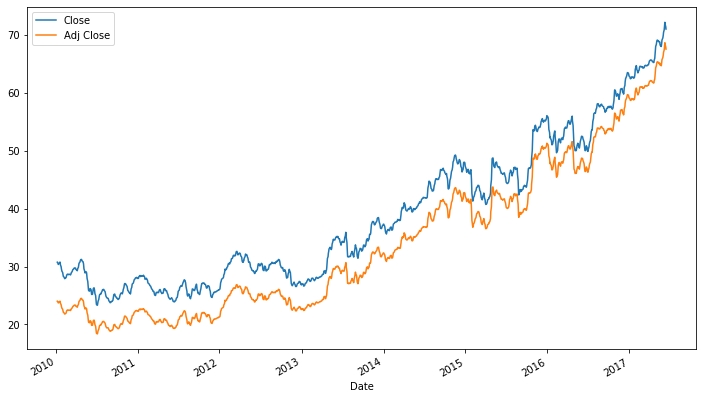

In [85]:
own_dataframe.rolling(5)[['Close', 'Adj Close']].mean().plot();

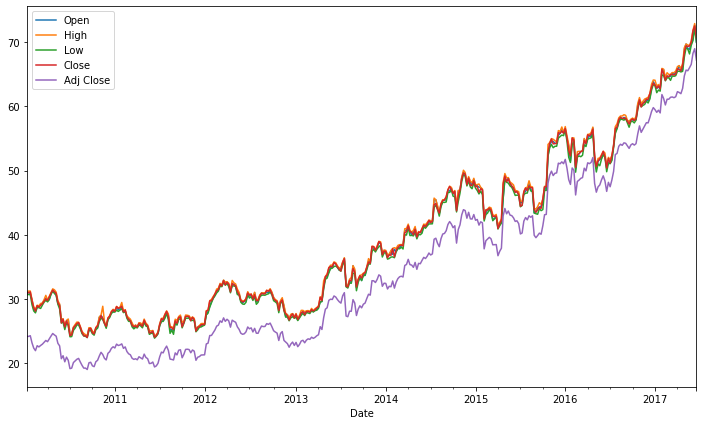

In [86]:
own_dataframe.drop('Volume', axis=1).resample('1W').max().plot();

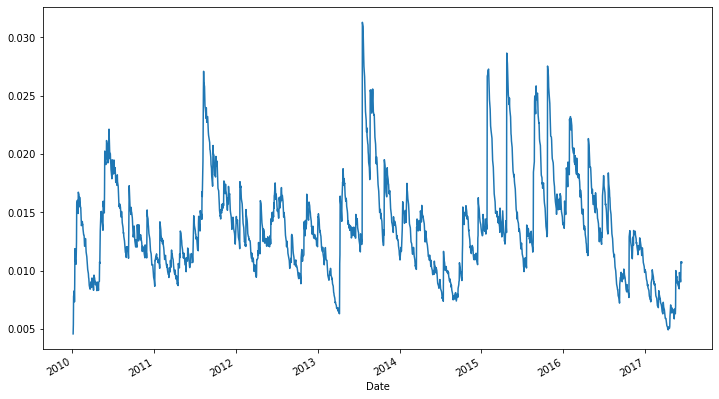

In [88]:
own_dataframe['Close'].pct_change().ewm(span=30).std().plot();

# **"Real World" Data**

Also i have to copy the code from the file avocados.py to get the following data

In [89]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.

    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [90]:
avocados1 = read_avocadata('2014','2016')
avocados1.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [91]:
# Check dtype for each column
avocados1.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

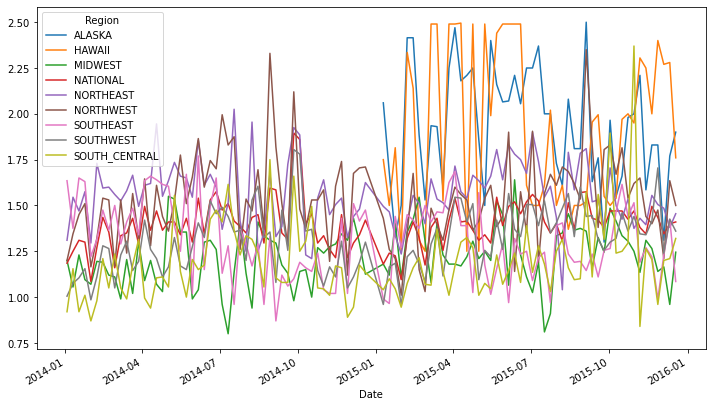

In [92]:
# What's the regional average price of a HASS avocado every day?
hass_average = avocados1[avocados1.Variety == 'HASS']
hass_average.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [93]:
# a couple of functions given
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

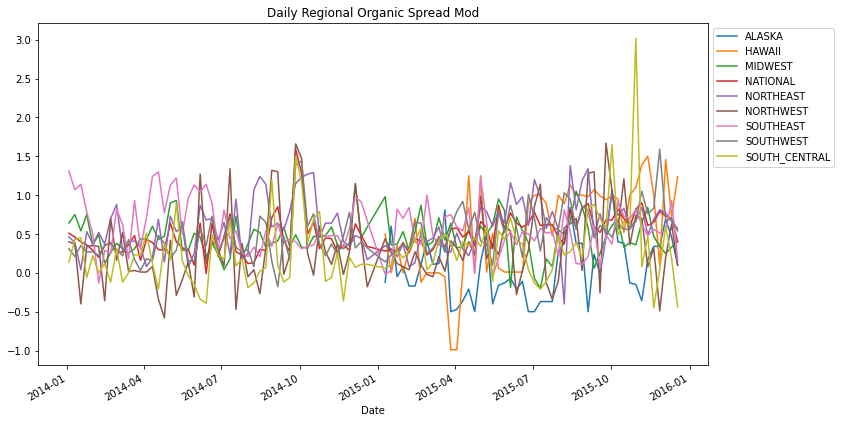

In [94]:
organic_spread_by_region(hass_average).plot();
plt.gca().set_title("Daily Regional Organic Spread Mod");
plt.legend(bbox_to_anchor=(1, 1));

In [95]:
spread_correlation1 = organic_spread_by_region(hass_average).corr()
spread_correlation1

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


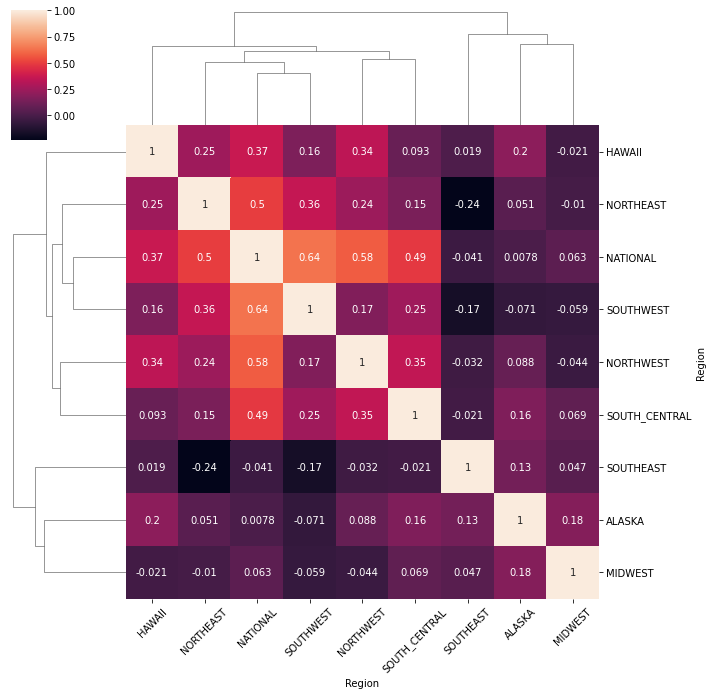

In [96]:
grid = sns.clustermap(spread_correlation1, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);